# Day 5

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print(platform.platform())

Windows-10-10.0.26100-SP0


In [2]:
from utils import 모델평가

## AutoGluon

```bash
conda create --name autogluon python=3.11  -c conda-forge --yes
conda activate autogluon
pip install --upgrade uv
uv pip install autogluon ipykernel ipywidgets
```

IPykernel은 주피터 노트북 실행을 위해 필요합니다. 비주얼 스튜디오에서 자동으로 설치 제안을 합니다. 필요한 경우, 아래 명령으로 수동 설치를 진행할 수 있습니다.

```bash
conda install -n autogluon ipykernel -c conda-forge
```

In [3]:
import autogluon

In [7]:
import joblib

housing = joblib.load('housing.joblib')
print(housing.keys())
housing.cleaned.sample(5).round(2)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR', 'cleaned'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
971,7.26,15.0,7.47,0.96,876.0,3.07,37.67,-121.90,3.32
13571,3.30,49.0,5.62,0.99,757.0,2.34,34.15,-117.29,1.03
10436,2.35,33.0,3.63,1.21,604.0,1.91,33.43,-117.61,1.88
9586,2.56,15.0,3.85,0.96,2024.0,1.97,37.32,-120.47,1.22
17607,7.86,26.0,7.36,1.00,626.0,2.57,37.29,-121.90,4.25


In [26]:
from autogluon.tabular import TabularDataset
from sklearn.model_selection import train_test_split

# train, test = train_test_split(housing.cleaned, random_state=3)
# 전처리를 안 한 원래 데이터
train, test = train_test_split(housing.frame, random_state=3)

train = TabularDataset(train)
test = TabularDataset(test)

train.sample(5).round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6593,9.07,43.0,7.34,1.02,1467.0,2.52,34.17,-118.18,5.00
12644,1.53,36.0,4.67,1.05,1226.0,3.14,38.54,-121.46,0.56
15792,1.38,52.0,2.70,1.13,1136.0,2.61,37.77,-122.42,3.12
12729,5.05,35.0,6.65,1.03,993.0,2.81,38.61,-121.36,1.44
1254,2.56,52.0,5.02,0.99,985.0,2.49,39.21,-122.01,0.76


In [28]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='MedHouseVal', path='housing_models')
predictor.fit(train)
# predictor.fit(train, presets='best_quality', time_limit=600)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun  5 18:30:46 UTC 2025
CPU Count:          12
Memory Avail:       7.50 GB / 15.57 GB (48.2%)
Disk Space Avail:   907.14 GB / 930.54 GB (97.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='best'    : Maximize accuracy. Recommended for most users. Use in

[1000]	valid_set's rmse: 0.464673
[2000]	valid_set's rmse: 0.455354
[3000]	valid_set's rmse: 0.45419
[4000]	valid_set's rmse: 0.454603


	-0.4539	 = Validation score   (-root_mean_squared_error)
	10.74s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ...
	Fitting with cpus=6, gpus=0, mem=0.0/7.9 GB


[1000]	valid_set's rmse: 0.431607
[2000]	valid_set's rmse: 0.429792


	-0.4293	 = Validation score   (-root_mean_squared_error)
	8.19s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestMSE ...
	Fitting with cpus=12, gpus=0
	-0.5056	 = Validation score   (-root_mean_squared_error)
	4.88s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: CatBoost ...
	Fitting with cpus=6, gpus=0
	-0.4172	 = Validation score   (-root_mean_squared_error)
	33.61s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	Fitting with cpus=12, gpus=0
	-0.5013	 = Validation score   (-root_mean_squared_error)
	1.99s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	Fitting with cpus=6, gpus=0, mem=0.0/7.5 GB
	-0.5651	 = Validation score   (-root_mean_squared_error)
	48.94s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	Fitting with cpus=6, gpus=0
	-0.4455	 = Validation score   (-root_mean_squared_error)
	8.17s	 = Training   runtime
	0.07s	 = 

[1000]	valid_set's rmse: 0.432491
[2000]	valid_set's rmse: 0.431692
[3000]	valid_set's rmse: 0.4314
[4000]	valid_set's rmse: 0.431367


	-0.4314	 = Validation score   (-root_mean_squared_error)
	11.01s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.591, 'LightGBM': 0.227, 'NeuralNetTorch': 0.091, 'LightGBMLarge': 0.091}
	-0.4133	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 241.38s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 6707.3 rows/s (1548 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/pyml/housing_models")


In [ ]:
예측 = predictor.predict(test.drop(columns=['MedHouseVal']))
test.assign(예측=예측).sample(5).round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,예측
9873,3.25,27.0,4.96,1.03,1644.0,3.63,36.61,-121.83,1.31,1.64
2798,1.79,25.0,5.85,1.50,632.0,2.16,36.13,-117.69,0.46,0.59
8873,3.99,47.0,5.22,1.10,1076.0,1.88,34.07,-118.41,5.00,4.71
16805,4.47,32.0,3.92,1.01,1096.0,3.10,37.66,-122.41,2.47,2.50
3228,2.35,28.0,5.23,0.97,588.0,3.27,36.30,-119.65,0.53,0.70


In [33]:
scores = predictor.evaluate(test)
pd.Series(scores).round(3)

root_mean_squared_error   -0.423
mean_squared_error        -0.179
mean_absolute_error       -0.270
r2                         0.864
pearsonr                   0.930
median_absolute_error     -0.170
dtype: float64

In [35]:
predictor.leaderboard(test).round(3)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.423,-0.413,root_mean_squared_error,1.136,0.231,155.479,0.010,0.000,0.010,2,True,10
1,CatBoost,-0.426,-0.417,root_mean_squared_error,0.052,0.006,33.614,0.052,0.006,33.614,1,True,4
2,LightGBMLarge,-0.436,-0.431,root_mean_squared_error,0.904,0.140,11.007,0.904,0.140,11.007,1,True,9
3,LightGBM,-0.440,-0.429,root_mean_squared_error,0.141,0.076,8.188,0.141,0.076,8.188,1,True,2
4,XGBoost,-0.447,-0.445,root_mean_squared_error,0.196,0.070,8.175,0.196,0.070,8.175,1,True,7
5,LightGBMXT,-0.460,-0.454,root_mean_squared_error,0.363,0.078,10.739,0.363,0.078,10.739,1,True,1
6,RandomForestMSE,-0.494,-0.506,root_mean_squared_error,3.289,0.228,4.880,3.289,0.228,4.880,1,True,3
7,ExtraTreesMSE,-0.501,-0.501,root_mean_squared_error,2.345,0.180,1.989,2.345,0.180,1.989,1,True,5
8,NeuralNetTorch,-0.511,-0.478,root_mean_squared_error,0.029,0.009,102.660,0.029,0.009,102.660,1,True,8
9,NeuralNetFastAI,-0.573,-0.565,root_mean_squared_error,0.126,0.018,48.942,0.126,0.018,48.942,1,True,6


## 결정트리

최대 깊이 (기본: 무제한): 35
       depth=unlimited  depth=17  depth=8  depth=4
train            1.000     0.987    0.754    0.583
test             0.611     0.633    0.688    0.580

특성 중요도:
MedInc        0.818
AveOccup      0.122
HouseAge      0.033
AveRooms      0.027
AveBedrms     0.000
Population    0.000
Latitude      0.000
Longitude     0.000
dtype: float64


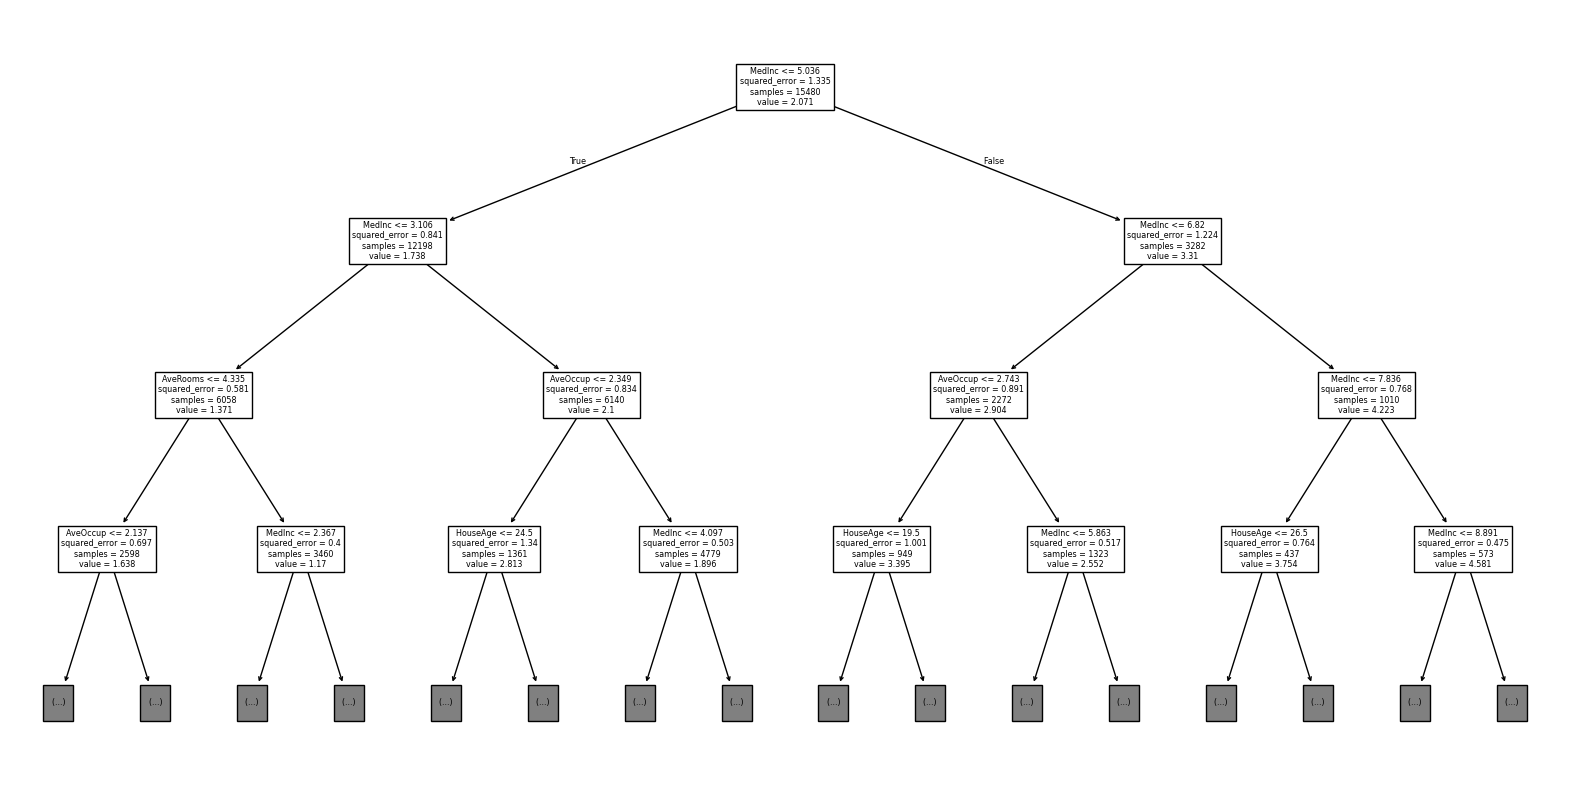

In [52]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

scores = {}

model = DecisionTreeRegressor(max_depth=None)
scores[f'depth=unlimited'] = 모델평가(model, housing.data, housing.target, random_state=3)
최대깊이 = model.get_depth()
print(f'최대 깊이 (기본: 무제한): {최대깊이}')

# 깊이 제한 (표현력 제한)
for _ in range(3):
    최대깊이 //= 2
    model = DecisionTreeRegressor(max_depth=최대깊이)
    scores[f'depth={최대깊이}'] = 모델평가(model, housing.data, housing.target, random_state=3)

print(pd.DataFrame(scores).round(3))

특성중요도 = model.feature_importances_
특성중요도 = pd.Series(특성중요도, index=housing.feature_names)
print('\n특성 중요도:')
print(특성중요도.sort_values(ascending=False).round(3))

plt.figure(figsize=(20,10))
plot_tree(model, max_depth=3, feature_names=housing.feature_names)
plt.show()

## RAM 가격

1957.0년: 411,041,792 달러/MB
최대 깊이: 25
train     1.000
test    -50.768
dtype: float64


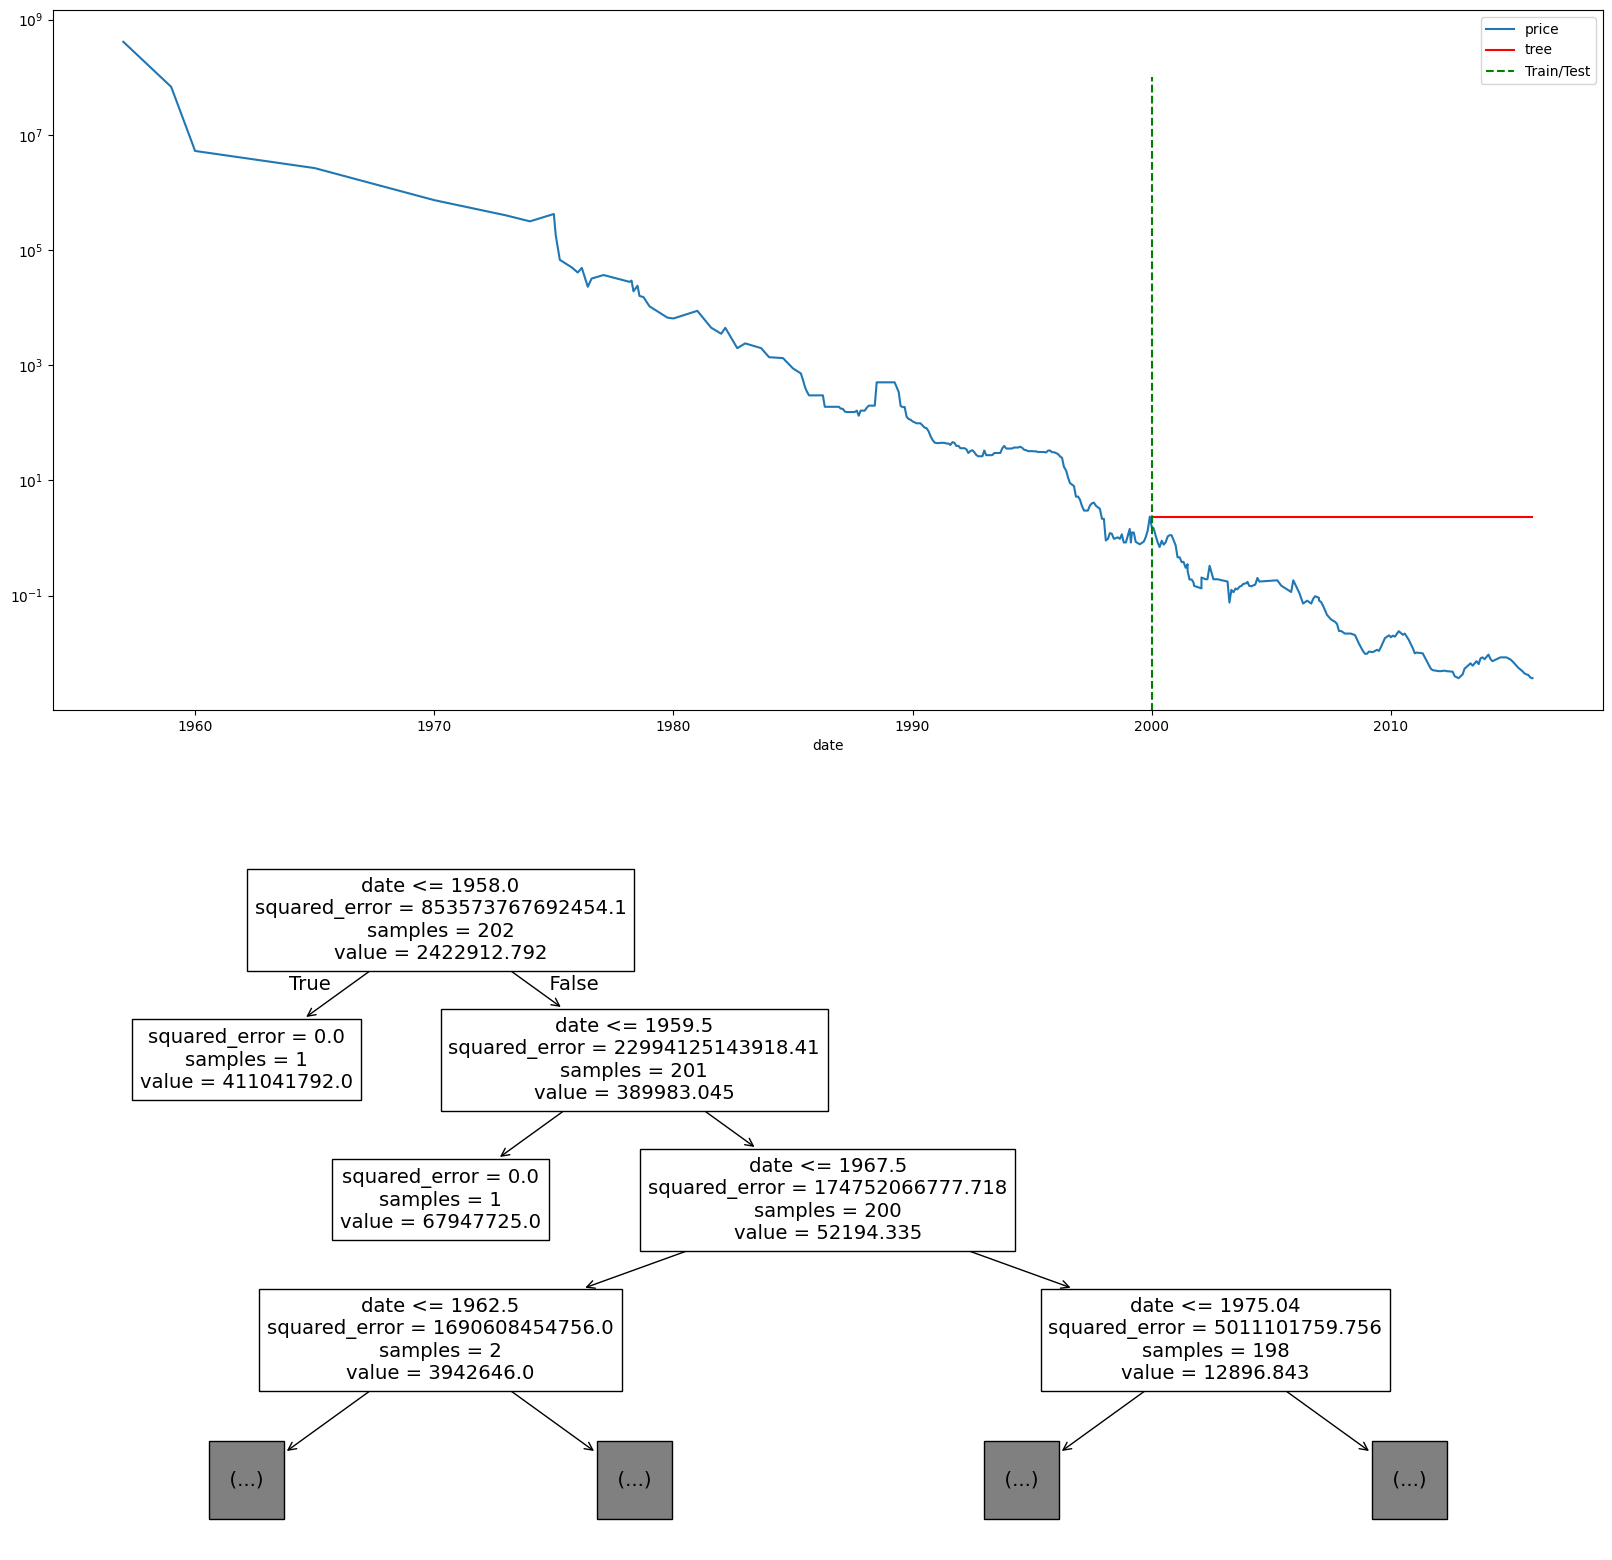

In [141]:
from sklearn.utils import Bunch
from sklearn.tree import DecisionTreeRegressor

ram = Bunch()
ram.frame = pd.read_csv('ram_price.csv')
print(f'{ram.frame.date[0]}년: {ram.frame.price[0]:,.0f} 달러/MB')

# 훈련/시험 데이터 분리
train = ram.frame[ram.frame.date < 2000]
test = ram.frame[ram.frame.date >= 2000]

model = DecisionTreeRegressor(max_depth=None)
model.fit(train[['date']], train['price'])
print(f'최대 깊이: {model.get_depth()}')
scores = {
    'train': model.score(train[['date']], train['price']),
    'test': model.score(test[['date']], test['price']),
}
print(pd.Series(scores).round(3))

fig, axes = plt.subplots(figsize=(20, 20), nrows=2, ncols=1)
위쪽 = axes[0]
ram.frame.set_index('date').plot(logy=True, ax=위쪽)
위쪽.plot(test['date'], model.predict(test[['date']]), 'r-', label='tree')
위쪽.vlines(2000, ymin=0, ymax=1e8, color='green', linestyle='--', label='Train/Test')
위쪽.legend()
아래쪽 = axes[1]
plot_tree(model, max_depth=3, feature_names=['date'], ax=아래쪽)
plt.show()

In [147]:
print(ram.frame['date'].shape, end=' Vs. ') # 단일 열 선택 -> 1차원 배열
print(ram.frame[['date']].shape) # 열 목록 선택 -> 2차원 배열

(333,) Vs. (333, 1)


In [85]:
from pathlib import Path
import sqlite3

DB_PATH = Path('sp500.db')
assert DB_PATH.exists(), f'{DB_PATH} 파일이 없습니다.'

conn = sqlite3.connect(DB_PATH)
# 테이블 목록 확인
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables = [t[0] for t in tables.values]
print(tables[:10], '...')

prices = {}
종목코드 = 'NVDA'  # NVIDIA
if 종목코드 in tables:
    print(f'{종목코드} 테이블이 있습니다.')
    prices[종목코드] = pd.read_sql(f'SELECT * FROM `{종목코드}`;', conn)
prices[종목코드].head().round(2)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A'] ...
NVDA 테이블이 있습니다.


,index,Open,High,Low,Close,Volume,Adj Close
0,1999-01-22 00:00:00,0.04,0.05,0.04,0.04,2714688000,0.04
1,1999-01-25 00:00:00,0.04,0.05,0.04,0.05,510480000,0.04
2,1999-01-26 00:00:00,0.05,0.05,0.04,0.04,343200000,0.04
3,1999-01-27 00:00:00,0.04,0.04,0.04,0.04,244368000,0.04
4,1999-01-28 00:00:00,0.04,0.04,0.04,0.04,227520000,0.04


In [86]:
prices['NVDA'].tail().round(2)

,index,Open,High,Low,Close,Volume,Adj Close
6654,2025-07-08 00:00:00,159.33,160.22,158.39,160.00,138133000,160.00
6655,2025-07-09 00:00:00,161.22,164.42,161.16,162.88,183656400,162.88
6656,2025-07-10 00:00:00,164.32,164.50,161.61,164.10,167704100,164.10
6657,2025-07-11 00:00:00,163.72,167.89,163.47,164.92,193633300,164.92
6658,2025-07-14 00:00:00,165.37,165.49,162.02,164.07,136658700,164.07


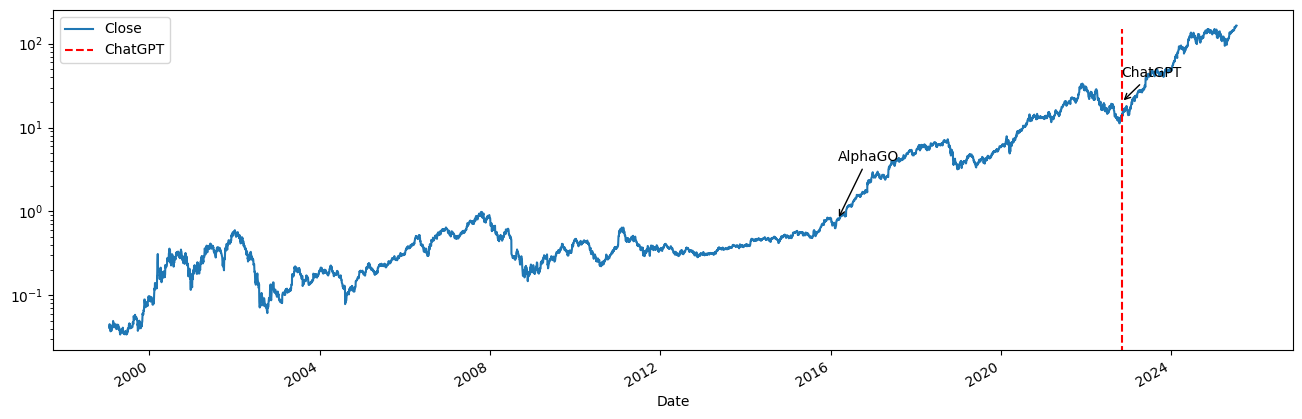

In [127]:
prices[종목코드] = pd.read_sql(
    f'SELECT * FROM `{종목코드}`;', conn,
    # 데이터프레임의 인덱스를 'index' 열로 설정
    index_col='index',
    # 'index' 열을 datetime 형식으로 변환
    parse_dates=['index'])
prices[종목코드].index.name = 'Date'
# prices[종목코드].info()

prices[종목코드].plot(y='Close', figsize=(16, 5), logy=True)
plt.annotate('AlphaGO', 
             xy=(pd.to_datetime('2016-03'), 0.8), 
             xytext=(pd.to_datetime('2016-03'), 4.0),
             arrowprops=dict(arrowstyle='->', color='black', linewidth=1))
plt.annotate('ChatGPT', 
             xy=(pd.to_datetime('2022-11'), 20), 
             xytext=(pd.to_datetime('2022-11'), 40),
             arrowprops=dict(arrowstyle='->', color='black', linewidth=1))
plt.vlines(x=pd.to_datetime('2022-11'), ymin=0, ymax=150, color='red', linestyle='--', label='ChatGPT')
plt.legend()
plt.show()

In [125]:
prices[종목코드].loc['2016-03'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,0.78600,0.81875,0.78475,0.81875,348700000,0.801857
2016-03-02,0.81425,0.82650,0.81275,0.82350,233812000,0.806509
2016-03-03,0.82250,0.82600,0.80525,0.81625,302004000,0.799409
2016-03-04,0.82250,0.82325,0.80750,0.81375,175304000,0.796960
2016-03-07,0.80925,0.81475,0.79800,0.80850,239968000,0.791819


## 조합 학습

앙상블(ensemble)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

scores = {}

tree = DecisionTreeRegressor(max_depth=None)
scores['tree'] = 모델평가(tree, housing.data, housing.target, random_state=3)

train_data, test_data, train_target, test_target = train_test_split(
    housing.data.to_numpy(), housing.target.to_numpy(), random_state=3)
# 앙상블
forest = []
for _ in range(100):
    tree = DecisionTreeRegressor(max_depth=None)
    # 부트스트랩 샘플링
    표본순서 = np.random.choice(len(train_data), size=len(train_data), replace=True)
    tree.fit(train_data[표본순서], train_target[표본순서])
    forest.append(tree)
print(f'트리 개수: {len(forest)}')

y_pred = {}
훈련예측 = np.array([tree.predict(train_data) for tree in forest])
시험예측 = np.array([tree.predict(test_data) for tree in forest])
print(f'(트리수, 표본수): {시험예측.shape}')
# 최종 예측은 각 표본에 대한 트리들의 예측 평균
y_pred['train'] = 훈련예측.mean(axis=0)
y_pred['test'] = 시험예측.mean(axis=0)

scores['forest'] = {
    'train': r2_score(train_target, y_pred['train']),
    'test': r2_score(test_target, y_pred['test']),
}

pd.DataFrame(scores).round(3)

트리 개수: 100
(트리수, 표본수): (100, 5160)


,tree,forest
train,1.000,0.973
test,0.625,0.815


In [160]:
samples = np.arange(10)
부트스트랩샘플링 = lambda samples: np.random.choice(samples, size=len(samples), replace=True)

pd.DataFrame({
    '원본': samples,
    '부트스트랩 샘플1': sorted(부트스트랩샘플링(samples)),
    '부트스트랩 샘플2': sorted(부트스트랩샘플링(samples)),
}).T

,0,1,2,3,4,5,6,7,8,9
원본,0,1,2,3,4,5,6,7,8,9
부트스트랩 샘플1,2,3,5,6,6,6,6,6,8,8
부트스트랩 샘플2,0,0,1,2,3,4,4,7,8,8


In [163]:
from sklearn.ensemble import RandomForestRegressor

결정트리수 = 100
scores = {}
forest = RandomForestRegressor(
    n_estimators=결정트리수, bootstrap=False, max_depth=None, random_state=3)
scores['no bootstrap'] = 모델평가(forest, housing.data, housing.target, random_state=3)

forest = RandomForestRegressor(
    n_estimators=결정트리수, bootstrap=True, max_depth=None, random_state=3)
scores['bootstrap'] = 모델평가(forest, housing.data, housing.target, random_state=3)

pd.DataFrame(scores).round(3)

,no bootstrap,bootstrap
train,1.000,0.973
test,0.637,0.815
